In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('data.csv',encoding='ISO-8859-1')
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(1251, 2)

In [4]:
df['target'].value_counts()

spam    653
ham     598
Name: target, dtype: int64

In [5]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [6]:
encoder = LabelEncoder()

In [7]:
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder.transform(['ham','spam'])

array([0, 1])

In [10]:
df.duplicated().sum()

0

In [11]:
#nltk.download('punkt')

In [12]:
df['num_char'] = df['text'].apply(len)

In [13]:
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
df[['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,1251.000000,1251.000000,1251.000000
mean,106.617106,22.682654,2.424460
std,53.860884,11.003236,1.482595
min,3.000000,1.000000,1.000000
25%,52.000000,13.000000,1.000000
50%,123.000000,25.000000,2.000000
75%,154.000000,31.000000,3.000000
max,384.000000,95.000000,11.000000


In [17]:
df[df['target'] == 0][['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,598.000000,598.000000,598.000000
mean,71.541806,17.230769,1.819398
std,51.987765,11.948673,1.210296
min,3.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,384.000000,95.000000,11.000000


In [18]:
df[df['target'] == 1][['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,138.738132,27.675345,2.978560
std,30.418104,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_char', ylabel='Count'>

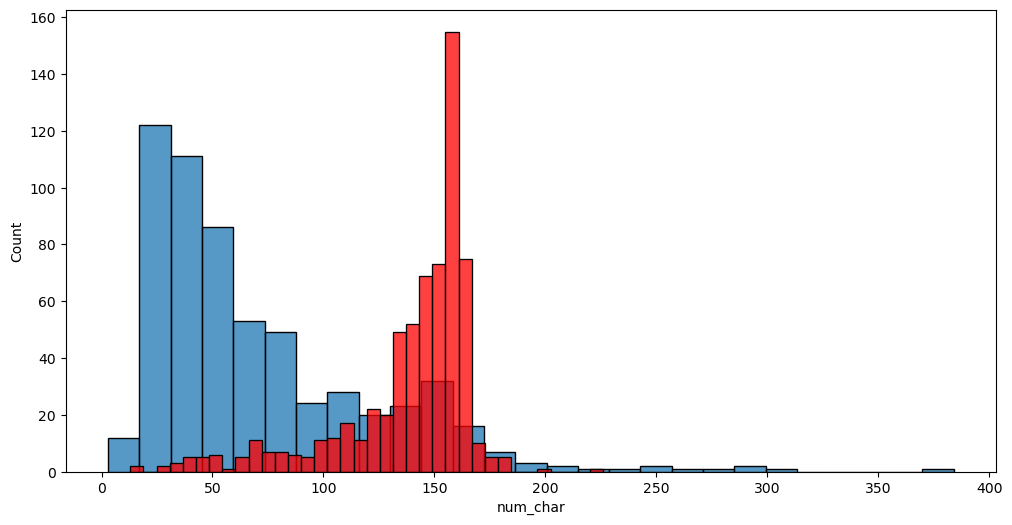

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')

<AxesSubplot: xlabel='num_word', ylabel='Count'>

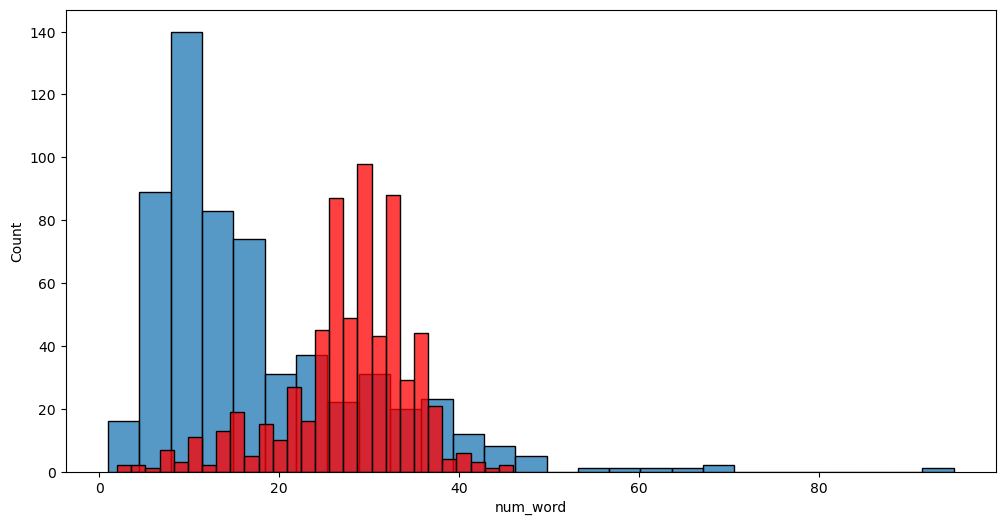

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'],color='red')

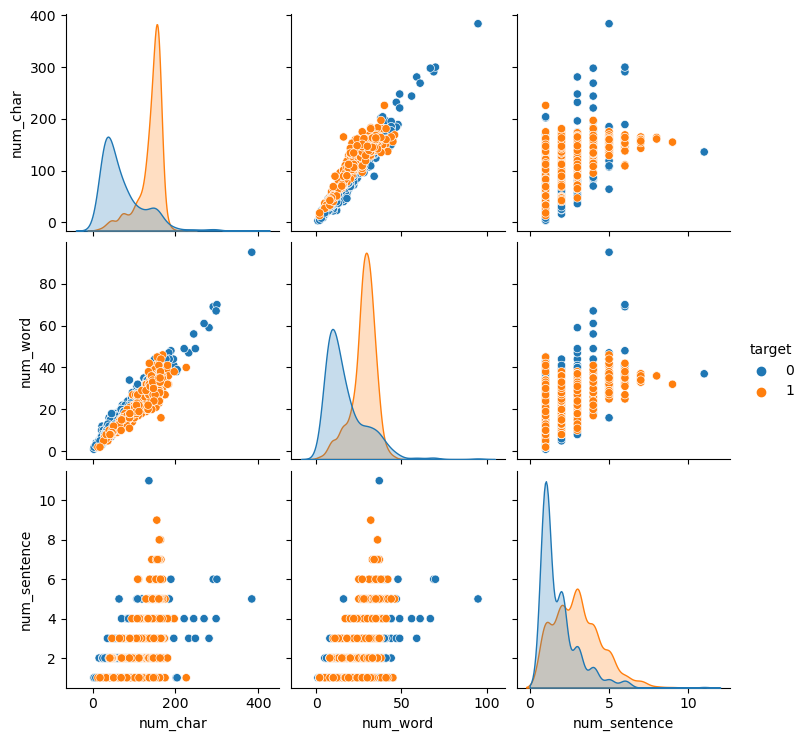

In [21]:
sns.pairplot(df,hue='target')

C:\Users\arppan\AppData\Local\Temp\ipykernel_5096\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

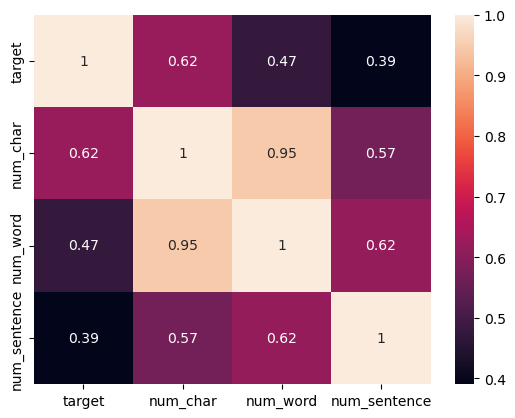

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [24]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [25]:
df['transformed_text'] = df['text'].apply(transform_text)

In [26]:
df.head()

,target,text,num_char,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [27]:
tfidf = TfidfVectorizer(max_features=3000)

In [28]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [29]:
y = df['target'].values

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
type(X_train)

numpy.ndarray

In [31]:
X_train.shape

(1000, 3000)

In [32]:
X_test.shape

(251, 3000)

In [33]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [34]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9442231075697212
0.95
0.9344262295081968


In [35]:
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9362549800796812
0.9416666666666667
0.9262295081967213


In [36]:
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.8167330677290837
0.8166666666666667
0.8032786885245902


In [37]:
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.8924302788844621
0.8925619834710744
0.8852459016393442


In [38]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9322709163346613
0.9565217391304348
0.9016393442622951


In [39]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9163346613545816
0.8914728682170543
0.9426229508196722


In [40]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))